### Check Hardware & RAM availability:

Commands to check for available GPU and RAM allocation on runtime

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 8.5 gigabytes of available RAM



---

### References:
* https://huggingface.co/
* https://arxiv.org/abs/1907.11692

---

### Install Required Libraries for Transformer Models:

* Pre-Trained Transformer models are part of Hugging Face Library(transformers).
* Similarly, any datatset part of Hugging Face can be called from the **datasets** library.
* Finally we will use a high level abstraction package called **k-train** to simplify our modelling and predictions

In [3]:
!pip install ktrain
!pip install transformers
!pip install datasets

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Using cached jieba-0.42.1.tar.gz (19.2 MB)
  Using cached syntok-1.4.4-py3-none-any.whl (24 kB)
  Using cached keras-bert-0.89.0.tar.gz (25 kB)
  Using cached Whoosh-2.7.4-py2.py3-none-any.whl (468 kB)
  Using cached keras-transformer-0.40.0.tar.gz (9.7 kB)
  Using cached keras-pos-embd-0.13.0.tar.gz (5.6 kB)
  Using cached keras-multi-head-0.29.0.tar.gz (13 kB)
  Using cached keras-layer-normalization-0.16.0.tar.gz (3.9 kB)
  Using cached keras-position-wise-feed-forward-0.8.0.tar.gz (4.1 kB)
  Using cached keras-embed-sim-0.10.0.tar.gz (3.6 kB)
  Using cached keras-self-attention-0.51.0.tar.gz (11 kB)
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25317001 sha256=9f458d535ab8c25b88111fe8b33196324e914f082562c98f08c43f5ba2b8c7f6
  Stored in directory: c:\users\administrator\appdata\local\p

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\administrator\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\\localcache\\local-packages\\python38\\site-packages\\matplotlib\\backends\\_backend_agg.cp38-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


---

### Import Libraries:

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ktrain
from ktrain import text
import tensorflow as tf
from sklearn.model_selection import train_test_split
from datasets import list_datasets
from datasets import load_dataset
from sklearn.metrics import classification_report, confusion_matrix
import timeit
import warnings

pd.set_option('display.max_columns', None)
warnings.simplefilter(action="ignore")

---

### Load Emotion Dataset:

In [5]:
# Load the 'emotion' dataset splits
emotion_train = load_dataset('emotion', split='train')
emotion_val = load_dataset('emotion', split='validation')
emotion_test = load_dataset('emotion', split='test')

# Print the details of each split
print("Details for Emotion Train Dataset: ", emotion_train.shape)  # Display the shape of the training dataset
print("Details for Emotion Validation Dataset: ", emotion_val.shape)  # Display the shape of the validation dataset
print("Details for Emotion Test Dataset: ", emotion_test.shape)  # Display the shape of the test dataset


Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)
Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


Details for Emotion Train Dataset:  (16000, 2)
Details for Emotion Validation Dataset:  (2000, 2)
Details for Emotion Test Dataset:  (2000, 2)


In [6]:
print("\nTrain Dataset Features for Emotion: \n", emotion_train.features)
print("\nTest Dataset Features for Emotion: \n", emotion_val.features)
print("\nTest Dataset Features for Emotion: \n", emotion_test.features)


Train Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

Test Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

Test Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


---

### Create DataFrame object:

For modelling, it is required to convert the dataset object into a dataframe object

In [7]:
# Convert the 'emotion' dataset splits to Pandas DataFrames
emotion_train_df = pd.DataFrame(data=emotion_train)
emotion_val_df = pd.DataFrame(data=emotion_val)


In [8]:
class_label_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

---

### Instantiating a RoBERTa Instance:

Create a RoBERTa instance with the model name, max token length, the labels to be used for each category and the batch size.

In [9]:
# Create a RoBERTa transformer
roberta_transformer = text.Transformer('roberta-base', maxlen=512, classes=class_label_names, batch_size=6)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

### Split Train & Validation data:

In [10]:
# Define training and testing data splits
X_train = emotion_train_df[:]["text"]  # Training data (text)
y_train = emotion_train_df[:]["label"]  # Training data labels
X_test = emotion_val_df[:]["text"]  # Testing data (text)
y_test = emotion_val_df[:]["label"]  # Testing data labels

# Print the shapes of the training and testing data arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(16000,) (16000,) (2000,) (2000,)


---

### Perform Data Preprocessing:

In [11]:
# Preprocess the training data using the RoBERTa transformer
roberta_train = roberta_transformer.preprocess_train(X_train.to_list(), y_train.to_list())

# Preprocess the testing data using the RoBERTa transformer
roberta_val = roberta_transformer.preprocess_test(X_test.to_list(), y_test.to_list())


preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 52


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 40
	99percentile : 52


---

### Compile RoBERTa in a K-Train Learner Object:

Since we are using k-train as a high level abstration package, we need to wrap our model in a k-train Learner Object for further compuation

In [12]:
# Get the RoBERTa model for text classification
roberta_model = roberta_transformer.get_classifier()


Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

In [13]:
# Create a RoBERTa learner instance for training and validation
roberta_learner_ins = ktrain.get_learner(model=roberta_model,
                                         train_data=roberta_train,
                                         val_data=roberta_val,
                                         batch_size=6)


---

### RoBERTa Model Details:

In [14]:
roberta_learner_ins.model.summary()

Model: "tf_roberta_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
roberta (TFRobertaMainLayer) multiple                  124055040 
_________________________________________________________________
classifier (TFRobertaClassif multiple                  595206    
Total params: 124,650,246
Trainable params: 124,650,246
Non-trainable params: 0
_________________________________________________________________


---

### Find Optimal Learning Rate for RoBERTa:

This is an optional step used just to show how the learning rate can be found for any transformer model.
For Transformer models as per the research papers, the optimal learning rates have already been estimated and established.

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
2666/2666 [==============================] - 1932s 719ms/step - loss: 1.1570 - accuracy: 0.5718
Epoch 2/3
2666/2666 [==============================] - 1928s 723ms/step - loss: 2.1816 - accuracy: 0.4102
Epoch 3/3
2666/2666 [==============================] - 1s 1us/step - loss: 41.9041 - accuracy: 0.3333


done.
Visually inspect loss plot and select learning rate associated with falling loss


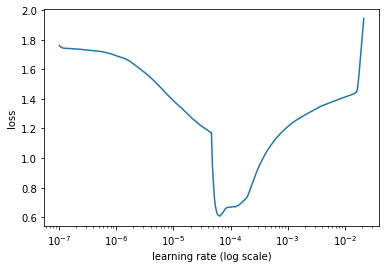


Total time in minutes on estimating optimal learning rate: 
 64.4713852703


In [15]:
import timeit

# Record the start time for learning rate estimation
rate_finder_start_time = timeit.default_timer()

# Estimate the optimal learning rate and display the plot
roberta_learner_ins.lr_find(show_plot=True, max_epochs=3)

# Record the stop time for learning rate estimation
rate_finder_stop_time = timeit.default_timer()

# Calculate and print the total time in minutes for estimating the optimal learning rate
print("\nTotal time in minutes on estimating optimal learning rate: \n", (rate_finder_stop_time - rate_finder_start_time) / 60)


---

### RoBERTa Optimal Learning Rates:

As per the evaluations made in the research paper "**RoBERTa: A Robustly Optimized BERT Pretraining Approach**", below are the best choices in terms of fine-tuning the model:

* Batch Sizes => {16, 32}
* Learning Rates => {1e−5, 2e−5, 3e−5}

We will choose the maximum among these for our fine-tuning and evaluation purposes.

---

### Fine Tuning RoBERTa on Emotion Dataset:

We take our emotion dataset along with the RoBERTa model, define the learning-rate & epochs to be used and start fine-tuning.

In [16]:
import timeit

# Record the start time for fine-tuning the RoBERTa model
roberta_fine_tune_start_time = timeit.default_timer()

# Fine-tune the RoBERTa model with a specific learning rate and number of epochs
roberta_learner_ins.fit_onecycle(lr=3e-5, epochs=3)

# Record the stop time for fine-tuning the RoBERTa model
roberta_fine_tune_stop_time = timeit.default_timer()

# Calculate and print the total time in minutes for fine-tuning RoBERTa on the Emotion dataset
print("\nTotal time in minutes for Fine-Tuning RoBERTa on Emotion Dataset: \n", (roberta_fine_tune_stop_time - roberta_fine_tune_start_time) / 60)




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/3
2667/2667 [==============================] - 1950s 727ms/step - loss: 0.5959 - accuracy: 0.7886 - val_loss: 0.2143 - val_accuracy: 0.9180
Epoch 2/3
2667/2667 [==============================] - 1941s 727ms/step - loss: 0.2196 - accuracy: 0.9162 - val_loss: 0.2071 - val_accuracy: 0.9205
Epoch 3/3
2667/2667 [==============================] - 1939s 726ms/step - loss: 0.1144 - accuracy: 0.9430 - val_loss: 0.1161 - val_accuracy: 0.9415

Total time in minutes for Fine-Tuning RoBERTa on Emotion Dataset: 
 97.16420645571665


---

### Checking RoBERTa performance metrics:

In [17]:
# Validate the performance of the RoBERTa model on the Emotion dataset
roberta_learner_ins.validate()


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       550
           1       0.95      0.98      0.96       704
           2       0.93      0.84      0.88       178
           3       0.97      0.91      0.94       275
           4       0.84      0.95      0.89       212
           5       0.95      0.75      0.84        81

    accuracy                           0.94      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000



array([[532,   1,   0,   4,  13,   0],
       [  1, 689,  11,   1,   1,   1],
       [  0,  28, 149,   1,   0,   0],
       [ 12,   1,   1, 250,  11,   0],
       [  5,   0,   0,   3, 202,   2],
       [  1,   6,   0,   0,  13,  61]])

In [18]:
# Validate the performance of the RoBERTa model on the Emotion dataset with specified class names
roberta_learner_ins.validate(class_names=class_label_names)


              precision    recall  f1-score   support

     sadness       0.97      0.97      0.97       550
         joy       0.95      0.98      0.96       704
        love       0.93      0.84      0.88       178
       anger       0.97      0.91      0.94       275
        fear       0.84      0.95      0.89       212
    surprise       0.95      0.75      0.84        81

    accuracy                           0.94      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000



array([[532,   1,   0,   4,  13,   0],
       [  1, 689,  11,   1,   1,   1],
       [  0,  28, 149,   1,   0,   0],
       [ 12,   1,   1, 250,  11,   0],
       [  5,   0,   0,   3, 202,   2],
       [  1,   6,   0,   0,  13,  61]])

In [19]:
# View and visualize the top losses for the RoBERTa model with the specified preprocessing
roberta_learner_ins.view_top_losses(preproc=roberta_transformer)


----------
id:1124 | loss:7.75 | true:anger | pred:sadness)

----------
id:1683 | loss:7.09 | true:anger | pred:joy)

----------
id:1046 | loss:7.07 | true:sadness | pred:fear)

----------
id:415 | loss:5.24 | true:love | pred:joy)



---

### Saving RoBERTa Model:

In [20]:
# Create a predictor for the RoBERTa model using the RoBERTa transformer for preprocessing
roberta_predictor = ktrain.get_predictor(roberta_learner_ins.model, preproc=roberta_transformer)

# Get and display the class labels associated with the predictor
roberta_predictor.get_classes()


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [21]:
roberta_predictor.save('/content/roberta-emotion-predictor')

In [22]:
!zip -r /content/roberta-emotion-predictor /content/roberta-emotion-predictor

  adding: content/roberta-emotion-predictor/ (stored 0%)
  adding: content/roberta-emotion-predictor/tokenizer_config.json (deflated 46%)
  adding: content/roberta-emotion-predictor/config.json (deflated 53%)
  adding: content/roberta-emotion-predictor/vocab.json (deflated 59%)
  adding: content/roberta-emotion-predictor/tf_model.preproc (deflated 45%)
  adding: content/roberta-emotion-predictor/tf_model.h5 (deflated 14%)
  adding: content/roberta-emotion-predictor/special_tokens_map.json (deflated 50%)
  adding: content/roberta-emotion-predictor/merges.txt (deflated 53%)


---

### Loading Saved Model for New Predictions:

In [23]:
roberta_predictor_new = ktrain.load_predictor('/content/roberta-emotion-predictor')
roberta_predictor_new.get_classes()

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

### Load Test data split:

In [24]:
emotion_test_df = pd.DataFrame(data=emotion_test)
print("\nShape of Test Dataset: ", emotion_test_df.shape,"\n\n")
emotion_test_df.head()


Shape of Test Dataset:  (2000, 2) 




,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [25]:
emotion_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


---

### Modify dataframe for label mis-match:

In [26]:
# Define a mapping dictionary for numeric labels to emotion names
label_dict = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

# Map numeric labels to emotion names in the "label" column of the test DataFrame
emotion_test_df["label"] = emotion_test_df["label"].map(label_dict)

# Display the first few rows
emotion_test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [27]:
# Convert all columns in the "emotion_test_df" DataFrame to the string data type
emotion_test_df[emotion_test_df.columns] = emotion_test_df[emotion_test_df.columns].astype(str)

---

### Use test data as new prediction data:

In [28]:
# Extract text and label data for testing from the DataFrame
X_test_new = emotion_test_df[:]["text"]  # Testing data (text)
y_test_new = emotion_test_df[:]["label"]  # Testing data labels

# Print the shapes of the new testing data arrays
print(X_test_new.shape, y_test_new.shape)


(2000,) (2000,)


In [29]:
# Make predictions on the new testing data using the RoBERTa predictor
test_predictions = roberta_predictor_new.predict(X_test_new.to_list())


---

### View Performance Metrics on new test data:

In [30]:
print(confusion_matrix(y_test_new, test_predictions))

[[248  13   2   0  12   0]
 [  2 217   0   0   2   3]
 [  0   2 676  14   3   0]
 [  1   0  39 119   0   0]
 [  7   6   4   0 564   0]
 [  1  19   9   0   2  35]]


In [31]:
print(classification_report(y_test_new, test_predictions))

              precision    recall  f1-score   support

       anger       0.96      0.90      0.93       275
        fear       0.84      0.97      0.90       224
         joy       0.93      0.97      0.95       695
        love       0.89      0.75      0.82       159
     sadness       0.97      0.97      0.97       581
    surprise       0.92      0.53      0.67        66

    accuracy                           0.93      2000
   macro avg       0.92      0.85      0.87      2000
weighted avg       0.93      0.93      0.93      2000



---